In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Segmentation data
pupil_xyr = [200, 200, 51]
iris_xyr = [196, 210, 181]

# Output dilation
dil = 0.2

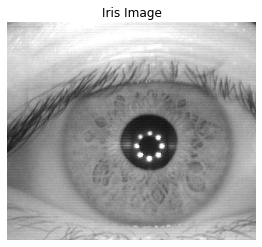

In [2]:
# Open input image
im1 = Image.open('../samples/S1008R02.png')

plt.imshow(im1, cmap='gray')
plt.title('Iris Image')
plt.axis('off')
plt.show()

In [3]:
# Get input shape
im1 = np.array(im1)
shape = im1.shape
if len(shape) == 2:
    im1 = np.expand_dims(im1, 2)
N, M, chanels = im1.shape

im1.shape

(280, 320, 1)

In [5]:
# Get color of central pixel
if chanels == 3:
    Rpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,0]
    Gpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,1]
    Bpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,2]
    col = np.array([Rpup, Gpup, Bpup])
else:
    col = im1[int(pupil_xyr[0]), int(pupil_xyr[1])]
    
col

array([152], dtype=uint8)

In [8]:
# Get original pupuil and iris radii:
rp1 = pupil_xyr[2]
ri = iria_xyr[2]

NameError: name 'iria_xyr' is not defined

In [9]:
# Compute output pupil radius:
rp2 = dil*ri

NameError: name 'ri' is not defined

In [6]:
# Create putput image:
im2 = np.zeros((N, M, chanels), dtype=np.uint8)

im2.shape

(280, 320, 1)